In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('Tobol2018.csv')

In [21]:
df

,Код поста,Дата,Значение
0,12001,2018-01-01,нб
1,12001,2018-01-02,нб
2,12001,2018-01-03,нб
3,12001,2018-01-04,нб
4,12001,2018-01-05,нб
...,...,...,...
360,12001,2018-12-27,нб
361,12001,2018-12-28,нб
362,12001,2018-12-29,нб
363,12001,2018-12-30,нб


In [23]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [24]:
# Извлекаем день, месяц и год
# Год
df['Год'] = df['Дата'].dt.year
# Месяц
df['Месяц'] = df['Дата'].dt.month
# День
df['День'] = df['Дата'].dt.day

In [26]:
df['Код поста'].unique()

array([12001], dtype=int64)

In [27]:
df[df['Значение'] == 'нб']

,Код поста,Дата,Значение,Год,Месяц,День
0,12001,2018-01-01,нб,2018,1,1
1,12001,2018-01-02,нб,2018,1,2
2,12001,2018-01-03,нб,2018,1,3
3,12001,2018-01-04,нб,2018,1,4
4,12001,2018-01-05,нб,2018,1,5
...,...,...,...,...,...,...
360,12001,2018-12-27,нб,2018,12,27
361,12001,2018-12-28,нб,2018,12,28
362,12001,2018-12-29,нб,2018,12,29
363,12001,2018-12-30,нб,2018,12,30


In [28]:
df['Значение'] = df['Значение'].replace('нб', np.nan) # Заменяем нб на nan

In [30]:
df['Значение'] = df['Значение'].fillna(0) # Заполняем nan на 0

In [31]:
df['Значение'] = df['Значение'].astype(float) # Переводим тип из object(str) в float

In [32]:
df['Значение']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
360    0.0
361    0.0
362    0.0
363    0.0
364    0.0
Name: Значение, Length: 365, dtype: float64

In [33]:
df['Значение'].mean() # среднее значение 

1.8527123287671232

In [34]:
df['Значение'].replace(0,round(df['Значение'].mean(), ndigits=3), inplace=True) 
# заменям(заполняем) все нули на среднее значение колонки

<Axes: xlabel='Дата'>

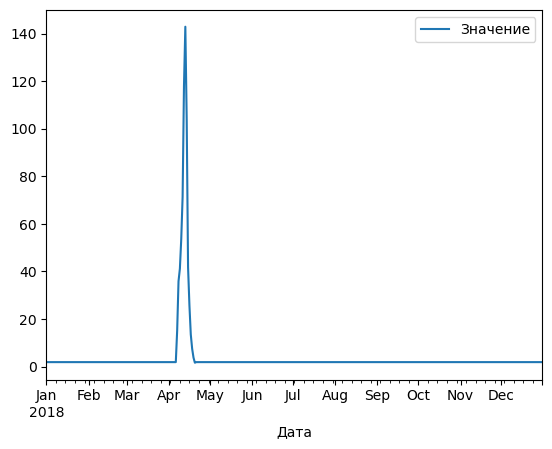

In [35]:
df.plot(kind='line', x='Дата', y='Значение')

# Обучаем модель линейной регрессии:

In [37]:
# Выделяем характеристики (год) и целевую переменную (значение) из рамки данных:
X = df['Год'].values.reshape(-1, 1)
y = df['Значение'].values

In [38]:
# Разделяем данные на обучающие и тестовые наборы, используя train_test_split из sklearn.model_selection:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Импортируем модель линейной регрессии из sklearn.linear_model и обучаем модель:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions and Calculate Statistics:

In [40]:
# Делаем прогнозы на тестовом наборе, используя обученную модель:
y_pred = model.predict(X_test)

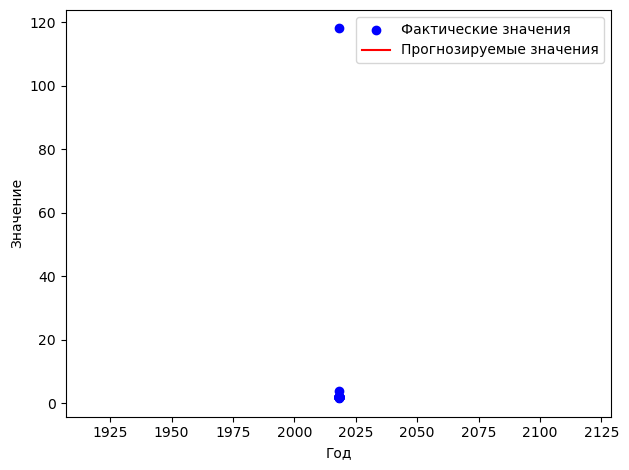

In [41]:
# Создаем точечную диаграмму фактических значений и прогнозируемых значений:
plt.scatter(X_test, y_test, color='blue', label='Фактические значения')
plt.plot(X_test, y_pred, color='red', label='Прогнозируемые значения')
plt.xlabel('Год')
plt.ylabel('Значение')
plt.legend()
plt.tight_layout()
plt.show()

Чтобы оценить точность модели линейной регрессии и сравнить фактические значения с прогнозируемыми, вы можете использовать различные регрессионные показатели. Вот пример с использованием показателей среднеквадратичной ошибки (MSE) и коэффициента детерминации (R-квадрат):

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Mean Squared Error (MSE): 122.55942144772226
Coefficient of Determination (R-squared): -0.0085204560448644


Среднеквадратичная ошибка (MSE) измеряет среднеквадратичную разницу между прогнозируемыми значениями и фактическими значениями. Более низкий MSE указывает на лучшее соответствие модели данным.

Коэффициент детерминации (R-квадрат) представляет собой долю дисперсии целевой переменной, которая может быть объяснена с помощью модели линейной регрессии. Оно колеблется от 0 до 1, где 1 означает идеальную посадку. Более высокие значения R-квадрата указывают на лучшее соответствие модели данным.

Распечатав эти показатели, вы сможете оценить точность и производительность вашей модели линейной регрессии.

In [43]:
# Рассчитаем статистические данные, такие как среднее, максимальное и минимальное значения за 1 год:
year_stats = df.groupby('Год')['Значение'].agg(['mean', 'max', 'min'])

In [44]:
year_stats

,mean,max,min
Год,,,
2018,3.634638,143.0,1.6


In [45]:
year_stats.describe()

,mean,max,min
count,1.000000,1.0,1.0
mean,3.634638,143.0,1.6
std,NaN,NaN,NaN
min,3.634638,143.0,1.6
25%,3.634638,143.0,1.6
50%,3.634638,143.0,1.6
75%,3.634638,143.0,1.6
max,3.634638,143.0,1.6
